When working with different statistical distributions, we often want to make probabilistic statements based on the distribution. We typically want to know one of four things:

1. The density (pdf) at a particular value.

2. The distribution (cdf) at a particular value.

3. The quantile value corresponding to a particular probability.

4. A random draw of values from a particular distribution.

Every distribution that R handles has four functions. There is a root name, for example,the root name for the normal distribution is 'norm'. This root is prefixed by one of the letters

1. p for “probability”, the cumulative distribution function (c. d. f.)

2. q for “quantile”, the inverse c. d. f.

3. d for “density”, the density function (p. f. or p. d. f.)

4. r for “random”, a random variable having the specified distribution

For the normal distribution, these functions are pnorm, qnorm, dnorm, and rnorm. For the binomial distribution, these functions are pbinom, qbinom, dbinom, and rbinom. And so forth. For a continuous distribution (like the normal), the most useful functions for doing problems involving probability calculations are the ”p” and ”q” functions (c. d. f. and inverse c. d. f.), because the the density (p. d. f.) calculated by the ”d” function can only
be used to calculate probabilities via integrals and R doesn't do integrals.

For a discrete distribution (like the binomial), the ”d” function calculates the density (p.f.), which in this case is a probability f(x) = P(X = x) and hence is useful in calculating probabilities.

(1) Roll 12 dice simultaneously, and let X denotes the number of 6's that appear. Calculate the probability of getting 7, 8 or 9, 6's using R. (Try using the function pbinom); If we set S = {get a 6 on one roll}, P(S) = 1/6 and the rolls constitute Bernoulli trials; thus X ~ binom(size=12, prob=1/6) and we are looking for P(7 ≤ X ≤ 9).

(2) Assume that the test scores of a college entrance exam fits a normal distribution.
Furthermore, the mean test score is 72, and the standard deviation is 15.2. What is the percentage of students scoring 84 or more in the exam?

(3) On the average, five cars arrive at a particular car wash every hour. Let X count the number of cars that arrive from 10AM to 11AM, then X ~Poisson(λ = 5). What is probability that no car arrives during this time. Next, suppose the car wash above is in operation from 8AM to 6PM, and we let Y be the number of customers that appear in this period. Since this period covers a total of 10 hours, we get that Y ~ Poisson(λ = 5x10 = 50). What is the probability that there are between 48 and 50 customers, inclusive?

(4) Suppose in a certain shipment of 250 Pentium processors there are 17 defective processors. A quality control consultant randomly collects 5 processors for inspection to determine whether or not they are defective. Let X denote the number of defectives in the sample. Find the probability of exactly 3 defectives in the sample, that is, find P(X = 3).

(5) A recent national study showed that approximately 44.7% of college students have used Wikipedia as a source in at least one of their term papers. Let X equal the number of students in a random sample of size n = 31 who have used Wikipedia as a source.

(a) How is X distributed?

(b) Sketch the probability mass function.

(c) Sketch the cumulative distribution function.

(d) Find mean, variance and standard deviation of X.

In [1]:
# Problem 1

n<- 12
p<- 1/6
p_7_to_9<- pbinom(9,n,p)-pbinom(6,n,p)
print(p_7_to_9)

[1] 0.001291758


In [2]:
# Problem 2

mn=72
sdv=15.2
p_morethan_equal_84<- 1-pnorm(84,mean=mn,sd=sdv)
p_morethan_equal_84*100

[1] 21.49176

In [3]:
# Problem 3

lambda_X<- 5
prob_0_cars<- dpois(0,lambda_X)
prob_0_cars

lambda_Y<- 50
prob_48_to_50_cars<- ppois(50,lambda_Y)-ppois(47,lambda_Y)
prob_48_to_50_cars

[1] 0.006737947

[1] 0.1678485

In [4]:
# Problem 4

# Parameters
N <- 250       # total processors
K <- 17        # defective
n <- 5         # sample size
x <- 3         # number of defectives we want

# Hypergeometric probability
p <- dhyper(x, K, N - K, n)
print(p)

[1] 0.002351153


[1] 1.057984e-08 2.651082e-07 3.214377e-06 2.511632e-05 1.421138e-04
 [6] 6.203153e-04 2.172786e-03 6.272510e-03 1.521055e-02 3.142047e-02
[11] 5.587504e-02 8.622373e-02 1.161604e-01 1.372305e-01 1.426190e-01
[16] 1.306524e-01 1.056088e-01 7.532248e-02 4.735464e-02 2.618995e-02
[21] 1.270189e-02 5.378041e-03 1.975986e-03 6.250013e-04 1.684000e-04
[26] 3.811382e-05 7.109560e-06 1.064220e-06 1.228898e-07 1.027594e-08
[31] 5.537484e-10 1.443887e-11

[1] 1.057984e-08 2.756880e-07 3.490065e-06 2.860638e-05 1.707202e-04
 [6] 7.910356e-04 2.963822e-03 9.236332e-03 2.444689e-02 5.586736e-02
[11] 1.117424e-01 1.979661e-01 3.141265e-01 4.513570e-01 5.939760e-01
[16] 7.246284e-01 8.302372e-01 9.055597e-01 9.529143e-01 9.791043e-01
[21] 9.918062e-01 9.971842e-01 9.991602e-01 9.997852e-01 9.999536e-01
[26] 9.999917e-01 9.999988e-01 9.999999e-01 1.000000e+00 1.000000e+00
[31] 1.000000e+00 1.000000e+00

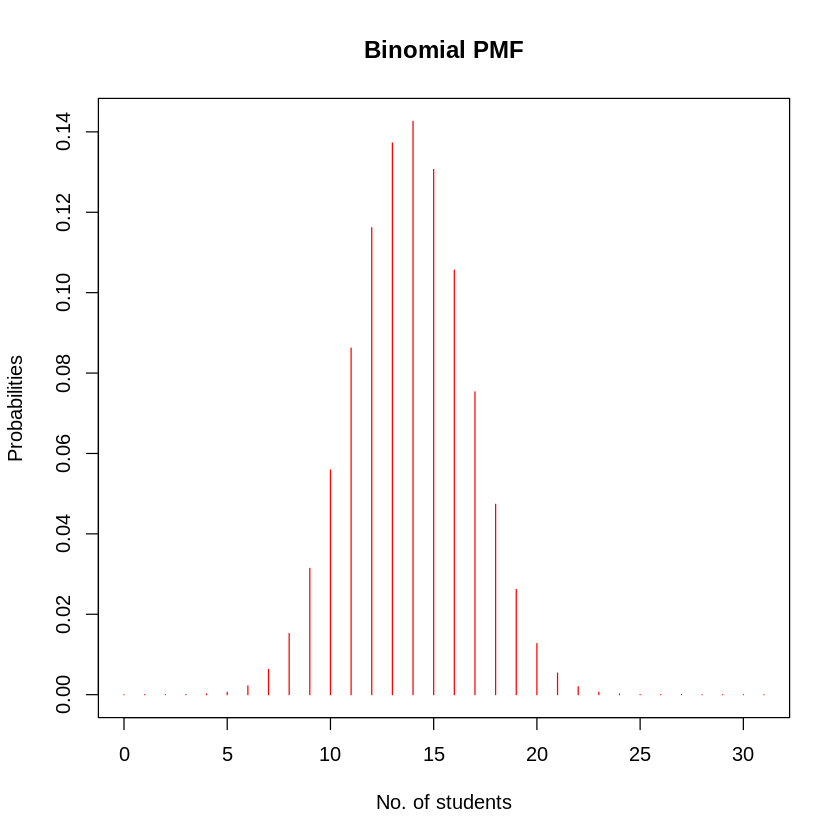

[1] 15.5

[1] 13.857

[1] 88

[1] 7.662921

[1] 9.380832

[1] 2.768198

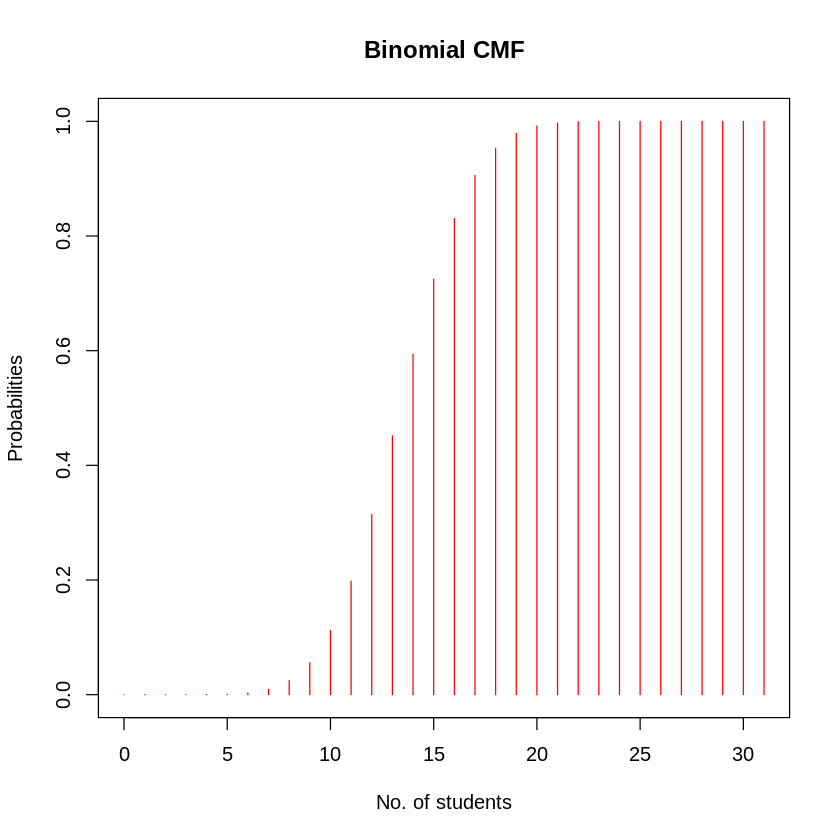

In [5]:
# Problem 5

n=31
p=0.447
X<- 0:31
pmf_values<- dbinom(X,n,p)
pmf_values
plot(X,pmf_values,type="h",col="red",main="Binomial PMF",xlab="No. of students",ylab="Probabilities")

cmf_values<- pbinom(X,n,p)
cmf_values
plot(X,cmf_values,type="h",col="red",main="Binomial CMF",xlab="No. of students",ylab="Probabilities")

mean(X)
mn<-n*p
mn

var(X)
vr<- n*p*(1-p)
vr

sqrt(var(X))
sd<-sqrt(vr)
sd